In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
import os
import json
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

def add_real_area_to_json(flat_json_path: str, output_path: str, image_dir: str, threshold_diam_mm: float = 20.0) -> None:
    """
    Adiciona q_d (área real em mm²) ao JSON usando o diâmetro do círculo envolvente mínimo
    extraído diretamente da imagem binária da máscara.

    Também exibe as imagens com contornos e círculos desenhados para conferência.

    Conversão: 100 px = 3 mm ⇒ 1 px = 0.03 mm
    """
    with open(flat_json_path, 'r') as f:
        data = json.load(f)

    px_to_mm = 3.0 / 100.0
    quantidade = 0
    
    for name in data:
        image_name = name if name.endswith(".png") else f"{name}.png"
        image_path = os.path.join(image_dir, image_name)

        if not os.path.exists(image_path):
            data[name]["q_d"] = None
            print(f"Imagem não encontrada: {image_path}")
            continue

        # Carregar a imagem em escala de cinza e binarizar
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        _, thresh = cv2.threshold(img, 10, 255, cv2.THRESH_BINARY)

        # Encontrar contornos
        contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        if not contours:
            data[name]["q_d"] = None
            print(f"Sem contornos encontrados para {image_name}")
            continue

        # Seleciona o maior contorno
        largest_contour = max(contours, key=cv2.contourArea)

        # Círculo envolvente mínimo
        (x, y), radius = cv2.minEnclosingCircle(largest_contour)

        diam_px = 2 * radius
        diam_mm = diam_px * px_to_mm
        area_mm2 = math.pi * (diam_mm / 2) ** 2

        data[name]["q_d"] = area_mm2


        if area_mm2 > 35.0:
            quantidade+=1
            # # Imprime os valores para debug
            # print(f"{image_name}: diâmetro = {diam_mm:.4f} mm, área = {area_mm2:.4f} mm²")

            # # Exibir sempre para debug
            # img_color = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
            # cv2.drawContours(img_color, [largest_contour], -1, (0, 255, 0), 2)
            # center = (int(x), int(y))
            # cv2.circle(img_color, center, int(radius), (0, 0, 255), 2)

            # plt.figure(figsize=(5, 5))
            # plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
            # plt.axis('off')
            # plt.tight_layout()
            # plt.show()

    with open(output_path, 'w') as f:
        json.dump(data, f, indent=4)

    print(f"\nArquivo atualizado com q_d (área em mm² com base no círculo mínimo) salvo em '{output_path}'.")
    print(f"Total de imagens com área maior que {threshold_diam_mm} mm²: {quantidade}")


In [3]:
add_real_area_to_json(
    flat_json_path="new_dataset_contours_aggregate.json",
    output_path="new_dataset_contours_aggregate_qd.json",
    image_dir="dataset/image_patchs"
)



Arquivo atualizado com q_d (área em mm² com base no círculo mínimo) salvo em 'new_dataset_contours_aggregate_qd.json'.
Total de imagens com área maior que 20.0 mm²: 314


In [4]:
json_file = "new_dataset_contours_aggregate_qd.json"
with open(json_file, 'r') as f:
    contours_data = json.load(f)
    print(f"Extracted contours from {len(contours_data)} patches.")
    
    for image, data in contours_data.items():
        print(f"{image}: q = {data['q']:.4f}, q_d = {data['q_d']:.4f} mm²")


Extracted contours from 7039 patches.
01_0.png: q = 0.0000, q_d = 0.2389 mm²
01_1.png: q = 0.0002, q_d = 2.2110 mm²
01_2.png: q = 0.0002, q_d = 3.0374 mm²
01_3.png: q = 0.0010, q_d = 12.0965 mm²
01_4.png: q = 0.0009, q_d = 10.8666 mm²
01_5.png: q = 0.0002, q_d = 1.9211 mm²
01_7.png: q = 0.0002, q_d = 1.8889 mm²
01_8.png: q = 0.0004, q_d = 4.5840 mm²
01_9.png: q = 0.0026, q_d = 30.6895 mm²
01_10.png: q = 0.0016, q_d = 12.3901 mm²
01_11.png: q = 0.0001, q_d = 1.1769 mm²
01_12.png: q = 0.0001, q_d = 0.6573 mm²
01_13.png: q = 0.0004, q_d = 5.0018 mm²
01_14.png: q = 0.0003, q_d = 2.8282 mm²
01_15.png: q = 0.0008, q_d = 8.9814 mm²
01_16.png: q = 0.0025, q_d = 24.5992 mm²
01_17.png: q = 0.0011, q_d = 22.5891 mm²
01_18.png: q = 0.0016, q_d = 16.7322 mm²
01_19.png: q = 0.0017, q_d = 30.0536 mm²
01_20.png: q = 0.0005, q_d = 5.0477 mm²
01_21.png: q = 0.0001, q_d = 0.6527 mm²
01_22.png: q = 0.0003, q_d = 2.6493 mm²
01_23.png: q = 0.0021, q_d = 23.9398 mm²
01_24.png: q = 0.0001, q_d = 1.3668 mm²
01

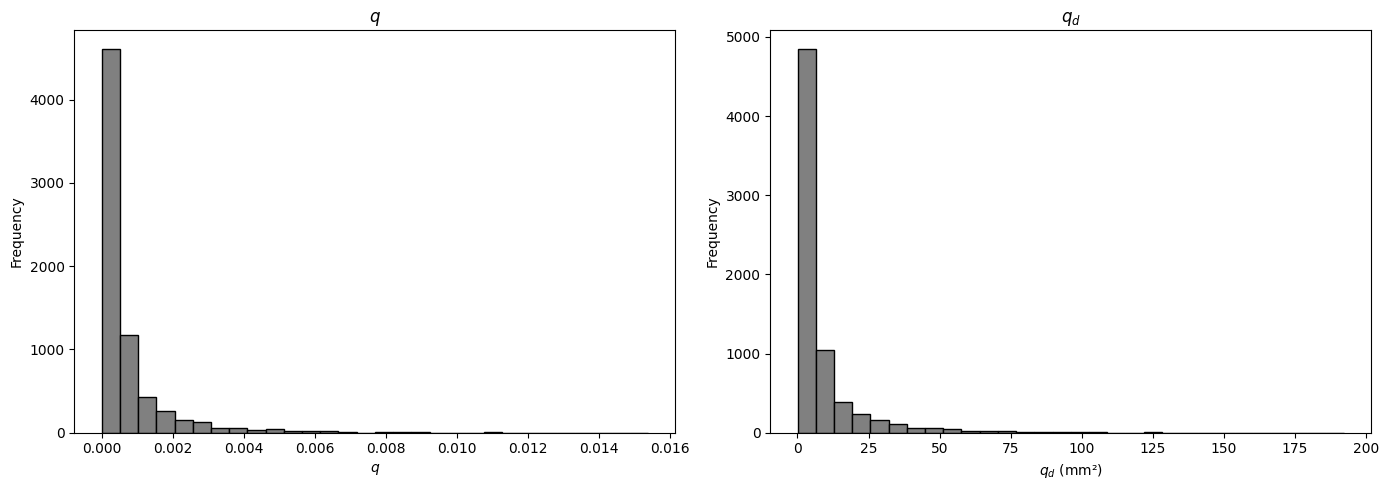

In [5]:
json_file = "new_dataset_contours_aggregate_qd.json"

with open(json_file, 'r') as f:
    data = json.load(f)

q_vals = [item["q"] for item in data.values()]
qd_vals = [item["q_d"] for item in data.values()]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(q_vals, bins=30, color='gray', edgecolor='black')
axes[0].set_title("$q$") 
axes[0].set_xlabel("$q$")
axes[0].set_ylabel("Frequency")

axes[1].hist(qd_vals, bins=30, color='gray', edgecolor='black')
axes[1].set_title("$q_d$")
axes[1].set_xlabel("$q_d$ (mm²)")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

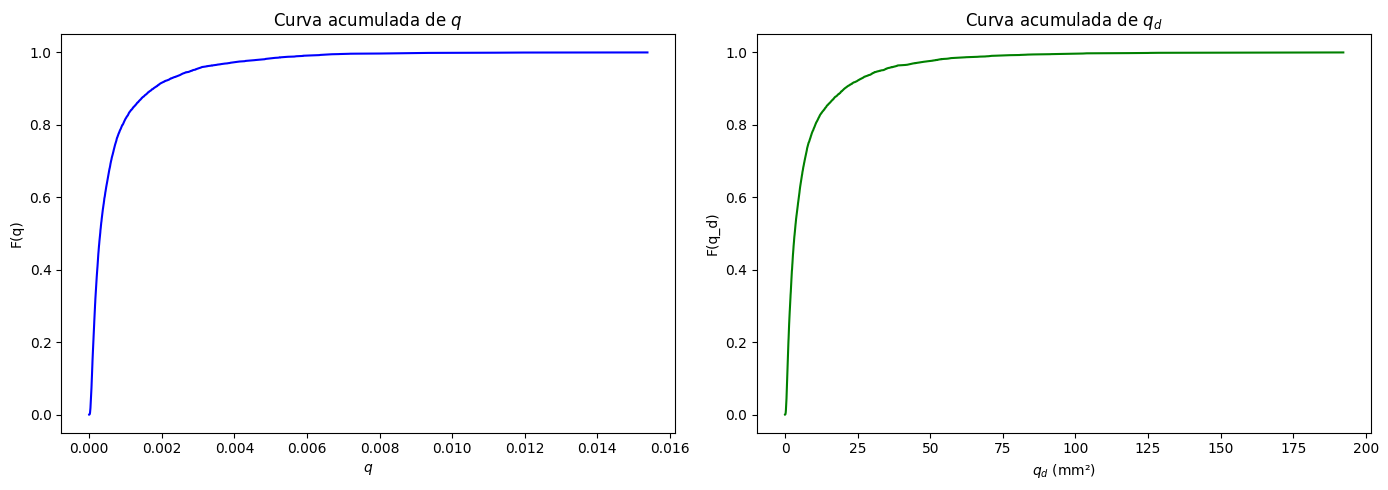

In [6]:
import numpy as np

with open(json_file, 'r') as f:
    data = json.load(f)

q_vals = np.array([item["q"] for item in data.values()])
qd_vals = np.array([item["q_d"] for item in data.values()])

# Ordenar para CDF
q_sorted = np.sort(q_vals)
qd_sorted = np.sort(qd_vals)
q_cdf = np.arange(1, len(q_sorted) + 1) / len(q_sorted)
qd_cdf = np.arange(1, len(qd_sorted) + 1) / len(qd_sorted)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# CDF q
axes[0].plot(q_sorted, q_cdf, color='blue')
axes[0].set_title("Curva acumulada de $q$")
axes[0].set_xlabel("$q$")
axes[0].set_ylabel("F(q)")

# CDF q_d
axes[1].plot(qd_sorted, qd_cdf, color='green')
axes[1].set_title("Curva acumulada de $q_d$")
axes[1].set_xlabel("$q_d$ (mm²)")
axes[1].set_ylabel("F(q_d)")

plt.tight_layout()
plt.show()
